In [11]:
from SBTS import * 
from schemes import *
from metrics import *
from tools import *

We consider the following GARCH model:
\begin{align*}
\begin{cases}
X_{t_{i+1}} = \sigma_{t_{i+1}}, \varepsilon_{t_{i+1}},\\
\sigma_{t_{i+1}}^2 = \alpha_0 + \alpha_1 X_{t_i}^2 + \alpha_2 X_{t_{i-1}}^2,
\end{cases}
\qquad i = 1, \ldots, N-1,
\end{align*}
with parameters $\alpha_0 = 5$, $\alpha_1 = 0.4$, and $\alpha_2 = 0.1$.
The initial conditions are $X_{t_0} = 0$, $X_{t_1} = 0$, and the innovations
$(\varepsilon_{t_i})_{i=1,\ldots,N} \overset{\text{iid}}{\sim} \mathcal{N}(0, 0.1)$.

We set $t_0 = 0$ and $\Delta t_i = 1/252$, corresponding to daily observations. Moreover, we use $N = 60$, $N^\pi = 100$, and $h = 0.2$.

To operate in a stationary regime, we discard the initial observations that are overly influenced by the initial conditions. Consequently, we focus on trajectories of the form
$(X_{t_p}, X_{t_{p+1}}, \ldots, X_{t_{p+N}})$, with the convention $X_{t_p} = 0$.
In our setting, choosing $p = 50$ is sufficient to ensure stationarity.

In [13]:
M = 3000   
N = 60
burn_in = 50  

alpha_0 = 5.0
alpha_1 = 0.4
alpha_2 = 0.1

h = 0.2
N_pi = 100 

X = simulate_GARCH(M, N, burn_in, alpha_0, alpha_1, alpha_2)

delta = 1/252

### Generation of synthetic trajectories 

In [25]:
vals = simulate_SBTS_trajectories(X, M, h, delta, N_pi, x0=None)

100%|███████████████████████████████████████| 3000/3000 [05:14<00:00,  9.55it/s]


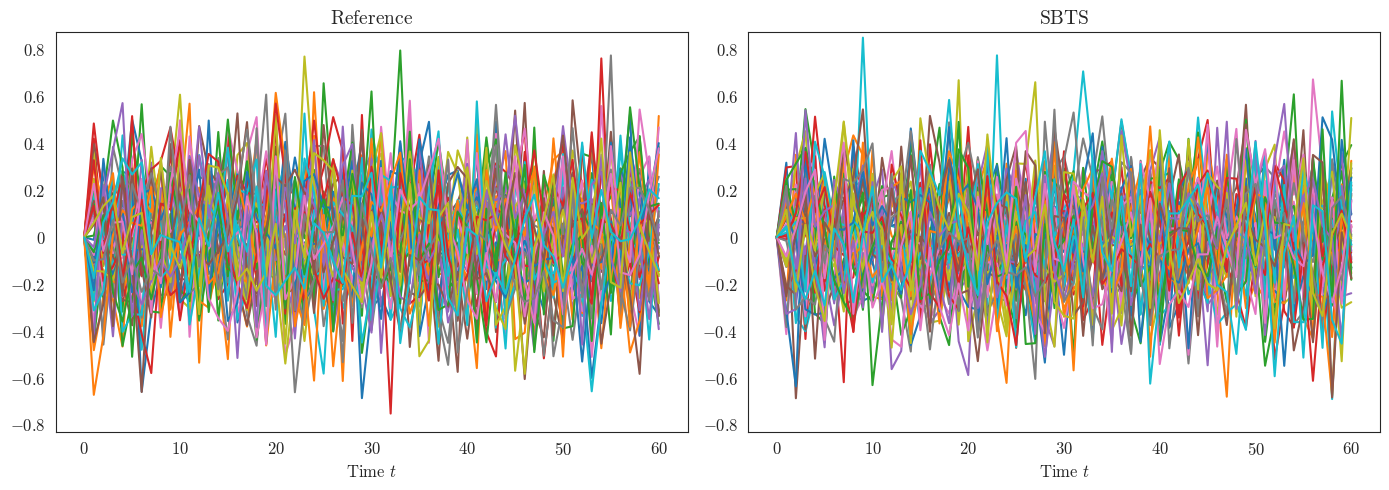

In [36]:
plot_traj_12(X[:50], vals[:50], samelim=True) 

### Join marginal distribution 

In [39]:
df_data_SBTS = pd.DataFrame()
df_data_SBTS["X_{t_1}"] = X[:,1].tolist() + vals[:,1].tolist()
df_data_SBTS["X_{t_2}"] = X[:,2].tolist() + vals[:,2].tolist()
df_data_SBTS["X_{t_3}"] = X[:,3].tolist() + vals[:,3].tolist()
df_data_SBTS["X_{t_{N-2}}"] = X[:,-2].tolist() + vals[:,-2].tolist()
df_data_SBTS["X_{t_{N-1}}"] = X[:,-2].tolist() + vals[:,-2].tolist()
df_data_SBTS["X_{t_N}"] = X[:,-1].tolist() + vals[:,-1].tolist()
df_data_SBTS["type"] = [r"$\text{Reference}$"] * M + [r"$\text{SBTS}$"] * M 

In [41]:
x = "X_{t_1}"
y = "X_{t_N}"

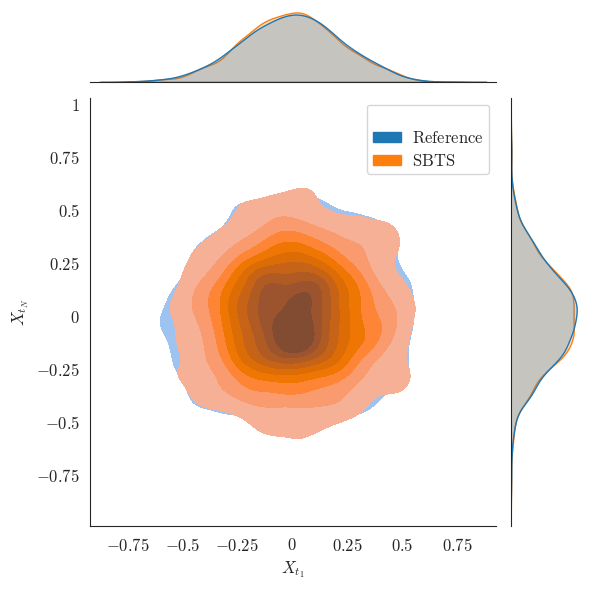

In [47]:
plot_join_marginal_distribution(df_data_SBTS, x, y)

### Kolmogorov-Smirnov test

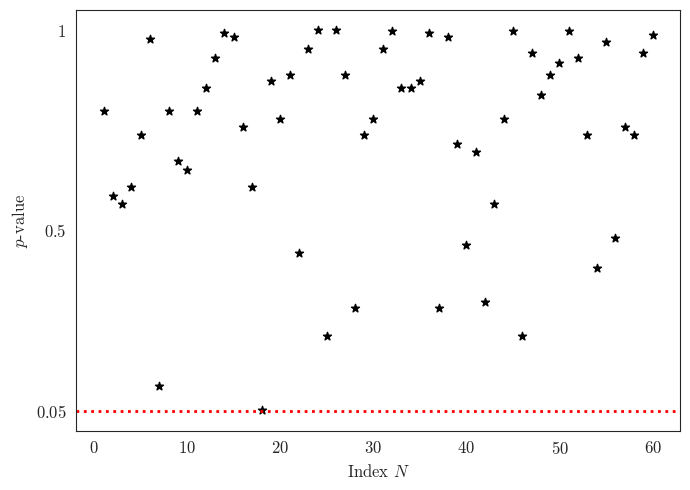

In [72]:
plot_pvalues_KS(X, vals, N)

### Quadratic variation 

In [76]:
quadratic_var_X = np.power(np.diff(X), 2).sum(axis = 1)
quadratic_var_SBTS = np.power(np.diff(vals), 2).sum(axis = 1)

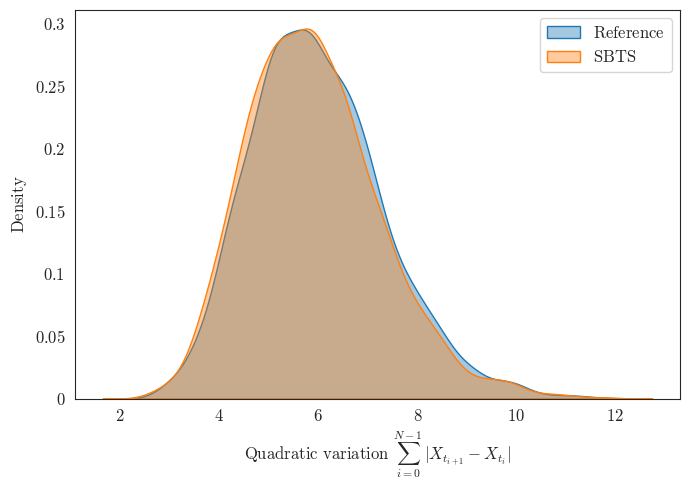

In [78]:
plot_quadratic_variation(quadratic_var_X, quadratic_var_SBTS)

### Choice of $(h,r)$ parameters 

In [116]:
M = 1000   
N = 60
burn_in = 50  

h_values = np.linspace(0.2, 1.1, 8)
r_values = [1, 2, 10, 30, 60]

alpha_0 = 5.0
alpha_1 = 0.4
alpha_2 = 0.1

N_pi = 100 

delta = 1/252
X_ = simulate_GARCH(M, N, burn_in, alpha_0, alpha_1, alpha_2)
X = X_[M//2:, :]
Y = X_[:M//2, :]

L = 100
Q = 100

epsilons = np.random.normal(0.0, 1.0, size=(N_pi, L))

MSE_matrix = compute_MSE_h_r(X, Y, delta, N_pi, L, Q, h_values, r_values, epsilons)

8it [00:31,  3.89s/it]


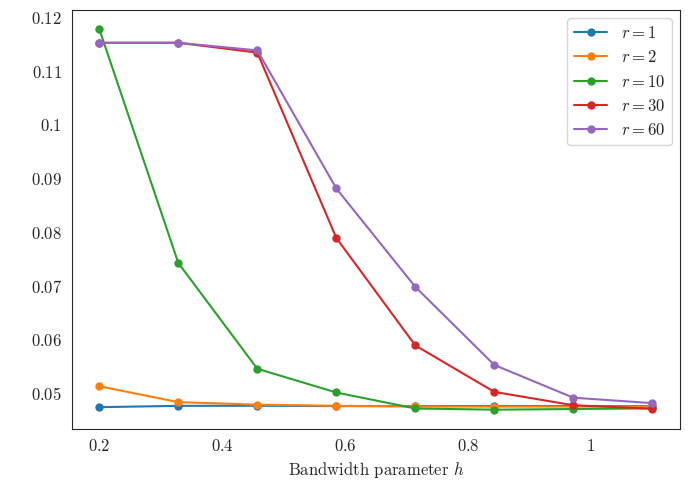

In [118]:
plot_MSE_matrix(MSE_matrix, h_values, r_values)

### Discriminative & Predictive Score.  

In [49]:
discriminative_scores, predictive_scores = scores(X, vals, col_pred = None, 
                                                  iterations = 2000, n_temp = 10, min_max = True, both = False)

100%|███████████████████████████████████████████| 10/10 [06:29<00:00, 38.91s/it]

Discriminative score : 0.01 +- 0.006
Predictive score : 0.0 +- 0.0
